# HIERARCHICAL CLUSTERING

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [ ]:
customer_data = pd.read_csv('shop-data.csv')

In [ ]:
customer_data.shape

(200, 5)

In [ ]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data = customer_data.iloc[:, 3:5].values

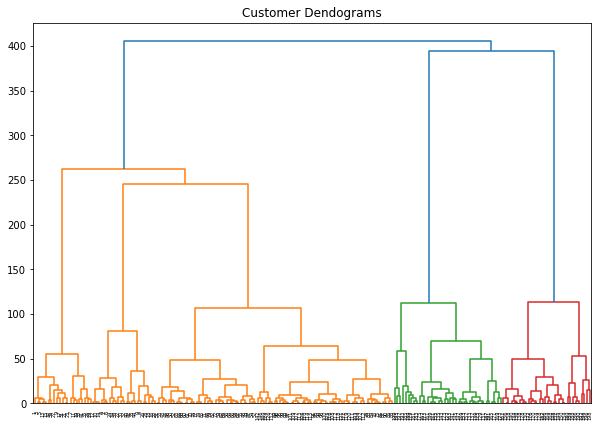

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

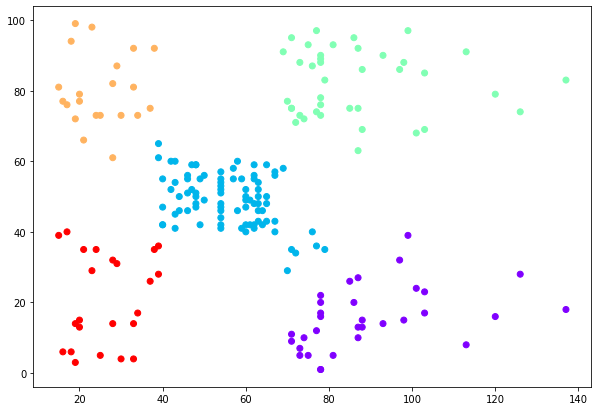

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

# K-MEANS

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [ ]:
num_samples_total = 1000
cluster_centers = [(20,20), (4,4)]
num_classes = len(cluster_centers)

In [ ]:
X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 2)

In [ ]:
np.save('./clusters.npy', X)
X = np.load('./clusters.npy')

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=num_classes, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2)

In [ ]:
P = kmeans.predict(X)

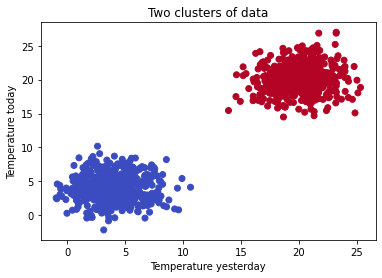

In [ ]:
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', P))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title('Two clusters of data')
plt.xlabel('Temperature yesterday')
plt.ylabel('Temperature today')
plt.show()